# 2. ANALISIS EXPLORATORIO DE DATOS (EDA)

## En esta seccion se analizo los paramentros de popularidad e idiomas mas predominantes para obtener un dataset representativo que funcionara con los recursos disponibles de mi sistema local

In [17]:
import pandas as pd
import seaborn as sns # --> Visualizacion de datos como box plots
import matplotlib.pyplot as plt #--> Visualizacion y exportacion de graficos

In [18]:
df_eda=pd.read_csv('../Datasets/cleaned_dataset.csv')

In [19]:
df_eda.head(5)

,budget,overview,popularity,release_date,revenue,title,vote_average,vote_count,return,release_year,genre_names,language_names,actor_names,director_name
0,30000000.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,12.451801,1995,"Animation, Comedy, Family",English,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,65000000.0,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,4.043035,1995,"Adventure, Fantasy, Family","English, Frances","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,0.0,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,0.000000,1995,"Romance, Comedy",English,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,16000000.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,5.090760,1995,"Comedy, Drama, Romance",English,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,0.0,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,0.000000,1995,Comedy,English,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


# 2A. ANALISIS DE POPULARIDAD DE PELICULAS

In [20]:
# conversion de datos no numericos a nulos en columna popularidad de pelicula
df_eda['popularity'] = pd.to_numeric(df_eda['popularity'], errors='coerce')

In [21]:
# Analisis estadistico de popularidad, popularidad media oscila alrededor de 3 con un puntaje maximo de 547.49
df_eda['popularity'].describe()

count    39231.000000
mean         3.289113
std          6.375122
min          0.000000
25%          0.510981
50%          1.392022
75%          4.548189
max        547.488298
Name: popularity, dtype: float64

## Analisis exploratorio de popularidad usando box plot

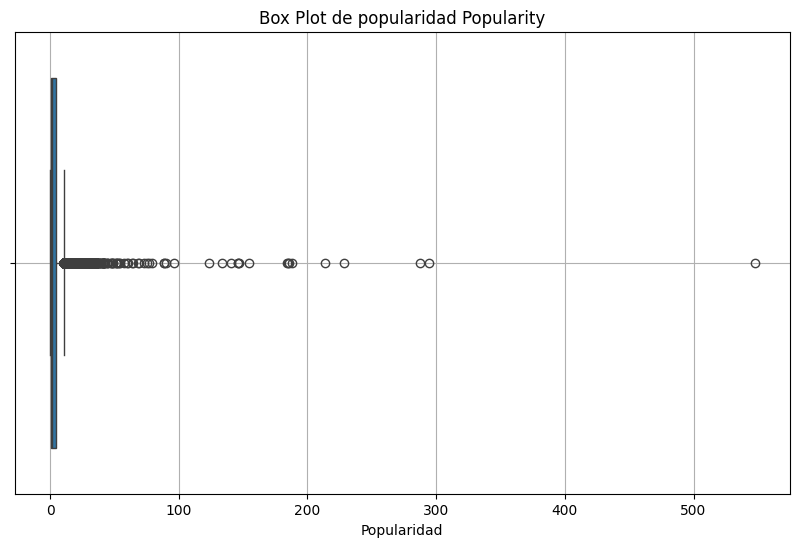

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda['popularity'])
plt.title('Box Plot de popularidad Popularity')
plt.xlabel('Popularidad')
plt.grid(True)
plt.show()

## Analisis exploratorio de popularidad usando diagrama de frecuencia (Histograma)

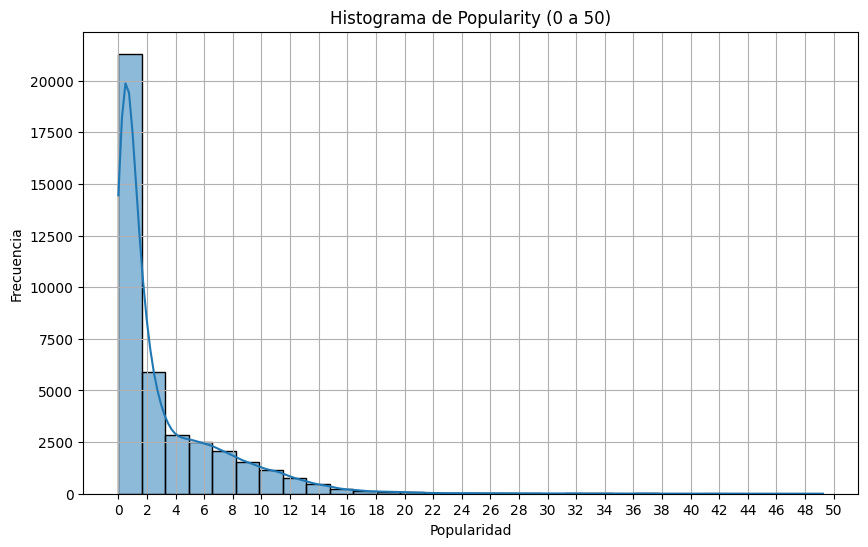

In [23]:
filtered_df = df_eda[(df_eda['popularity'] >= 0) & (df_eda['popularity'] <= 50 )]

# Histograma de popularidad para el rango dado de 0 a 50
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['popularity'], bins=30, kde=True)
plt.title('Histograma de Popularity (0 a 50)')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(range(0, 51, 2))
plt.show()



## Cantidad de peliculas con popularidad baja (menor que 1)

In [24]:
low_popularity= df_eda[df_eda['popularity'] < 1]['popularity'].count()
low_popularity

16146

## Grafico de peliculas mas populares

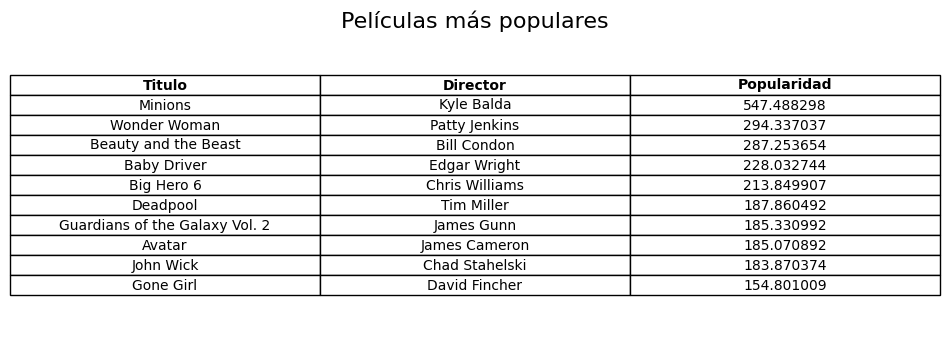

In [25]:

selected_columns = ['title','director_name','popularity']
# Cambiar el nombre de las columnas
top_10_popular = df_eda[selected_columns].nlargest(10, 'popularity')
top_10_popular.columns = ['Titulo', 'Director', 'Popularidad']

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 4))  # Ajustar el tamaño según sea necesario
ax.axis('tight')
ax.axis('off')

# Colocar el título
plt.title('Películas más populares', fontsize=16, pad=2)  # Ajusta el espaciado del título

# Crear la tabla
table = ax.table(cellText=top_10_popular.values,
                 colLabels=top_10_popular.columns,
                 cellLoc='center', loc='center')

# Establecer las columnas en negrita
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Ajustar la escala para que la tabla se ajuste mejor

# Negrita para los títulos de las columnas
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Filas de título
        cell.set_text_props(weight='bold')

# Mostrar la tabla con el título
plt.show()

## 2B. ANALISIS DE PELICULAS POR IDIOMAS MAS COMUNES EN OCCIDENTE

## Del siguiente conteo se concluyo que los idiomas mas representativos en el dataset son English, Español, Frances, Italiano, Japones y Portugues

In [26]:
# Split the 'language_names' column into individual languages and explode them into separate rows
df_exploded = df_eda['language_names'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_exploded.name = 'language'

# Count the occurrences of each language
language_counts = df_exploded.value_counts()

# Get the top 20 languages
top_20_languages = language_counts.head(20)

# Display the top 20 languages
print(top_20_languages)

English      24481
Frances       2300
 English      1810
 Frances      1703
Japones       1343
 Deutsch      1256
Italiano      1254
 Español      1230
Deutsch       1206
Español       1040
 Italiano      924
Pусский        850
 Pусский       637
हिन्दी         467
한국어/조선말        424
广州话 / 廣州話      390
普通话            387
 普通话           362
 Japones       358
Portugues      311
Name: language, dtype: int64


## Grafico de distribucion de idomas

In [27]:
# Filtra el DataFrame para incluir solo las filas con los idiomas especificados
pattern = r'\b(?:English|Frances|Italiano|Español|Portugues|Japones)\b'
filtered_df = df_eda[df_eda['language_names'].str.contains(pattern, regex=True, case=False, na=False)]

# Explota los idiomas para contar cada uno individualmente
exploded_languages = filtered_df['language_names'].str.split(',', expand=True).stack()
exploded_languages = exploded_languages.str.strip()

# Cuenta la cantidad de veces que aparece cada idioma
language_counts = exploded_languages.value_counts()

# Filtra los idiomas relevantes
language_counts = language_counts[language_counts.index.isin(['English', 'Frances', 'Italiano', 'Español', 'Portugues', 'Japones'])]

# Calcula los porcentajes
language_percentages = (language_counts / language_counts.sum()) * 100

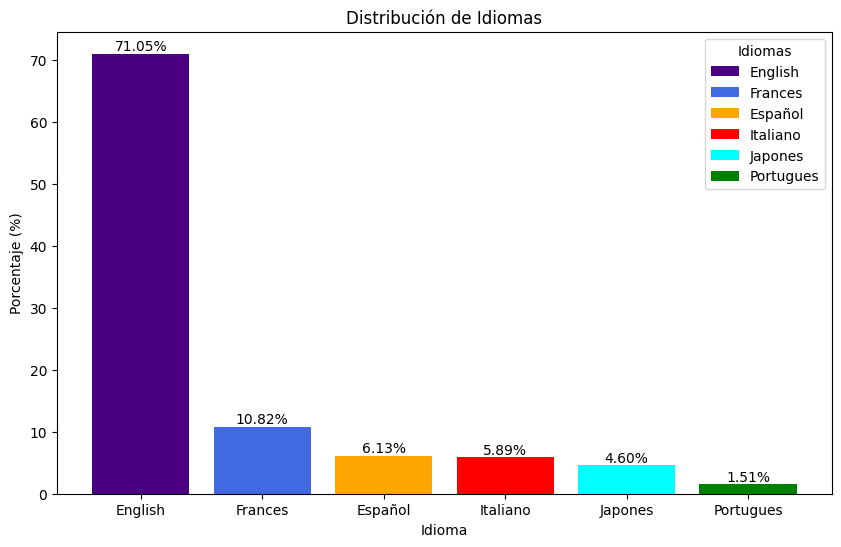

In [28]:
# Seleccion de colores para cada idioma
colors = {
    'English': 'indigo',
    'Frances': 'royalblue',
    'Italiano': 'red',
    'Español': 'orange',
    'Portugues': 'green',
    'Japones': 'cyan'
}

# Generar diagrama de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(language_percentages.index, language_percentages, color=[colors[lang] for lang in language_percentages.index])

# Configuracion de ejes
for bar, percentage in zip(bars, language_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

# Asignacion de titulo de ejes
plt.xlabel('Idioma')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de Idiomas')

# Creaccion de leyenda
plt.legend(bars, language_percentages.index, title="Idiomas", loc="upper right")

plt.show()

## 2C. REDUCCION DE DATAFRAME POR IDIOMAS Y POPULARIDAD PARA PRODUCTO MINIMO VIABLE

In [29]:
# FILTRO DE DATASET EN TERMINOS DE IDIOMA Y POPULARIDAD PARA FUNCIONAMIENTO LOCAL
pattern = r'\b(?:English|Frances|Italiano|Español|Portugues|Japones)\b'
# Apply the filter using the pattern
df_test = df_eda[(df_eda['language_names'].str.contains(pattern, regex=True, case=False, na=False)) & (df_eda['popularity'] > 7)]

In [30]:
# ASIGNACION DE INDICES PARA EL DATAFRAME RESULTANTE
df_test.reset_index(drop=True, inplace=True)
df_test.insert(0, 'Index', df_test.index)

In [31]:
df_test.shape

(5923, 15)

In [32]:
df_test.to_csv('../Datasets/df_test_output.csv', index=False)